# Credit Card Users Churn Prediction - Shib Golder

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [42]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# # To oversample and undersample data]
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

import shap

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [8]:
churn_df = pd.read_csv('BankChurners.csv') 

## Data Overview

- Observations
- Sanity checks

In [10]:
# Copy the data into a seperate dataframe
df = churn_df.copy()

In [11]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [12]:
# let's view the last 5 rows of the data
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [14]:
# Checking the number of rows and columns in the data
df.shape

(10127, 21)

In [15]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [18]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [22]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [24]:
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [27]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [28]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

CLIENTNUM
768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: proportion, Length: 10127, dtype: float64
--------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: proportion, dtype: float64
-

In [30]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [32]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

### Overall Data Observations

* There are total 10127 rows and 21 columns
* CLIENTNUM column unique identifier and might not be needed for the final model building
* Total 15 variables are numerical and rest are Object types
* No duplicates found on the data set
* 2 columns have less than 10127 values meaning there are missing values
* `Education_Level` column has 15 % missing values out of the total observations
* `Marital_Status` column has 7.4 % missing values out of the total observations
* Unique values in Income_Category are : abc values of 1112 count, need to fix this
* Replace the Categorical data `Attrition_Flag` into number values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [39]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [61]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [62]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [63]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

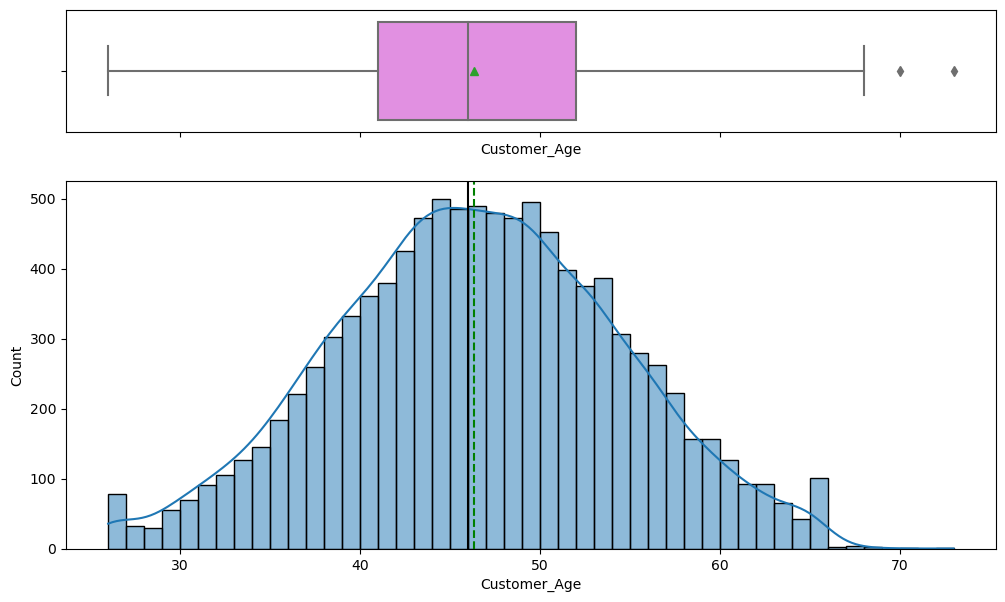

In [46]:
histogram_boxplot(df, "Customer_Age", kde=True)

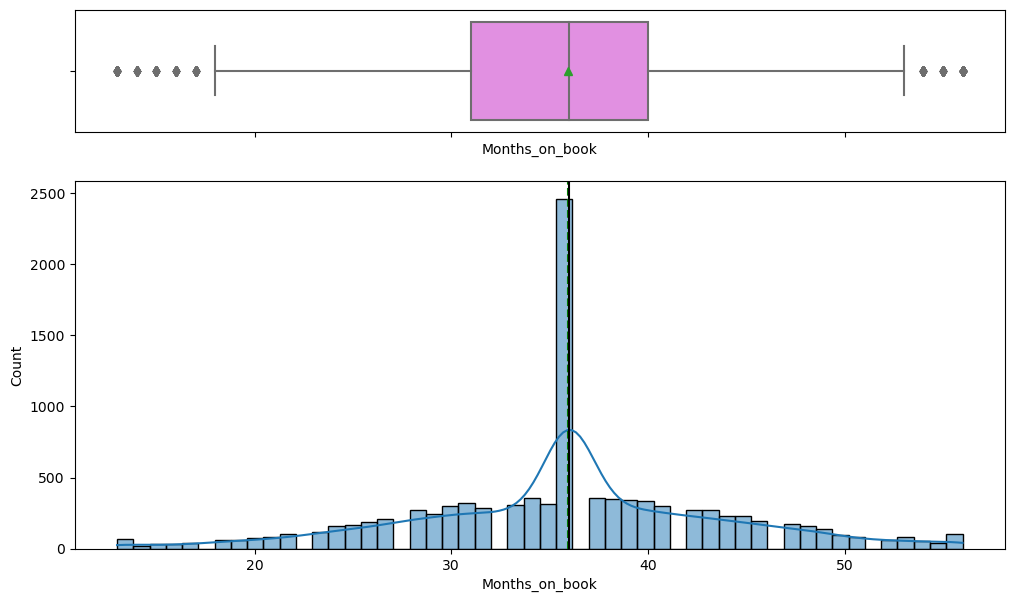

In [49]:
histogram_boxplot(df, "Months_on_book", kde=True)

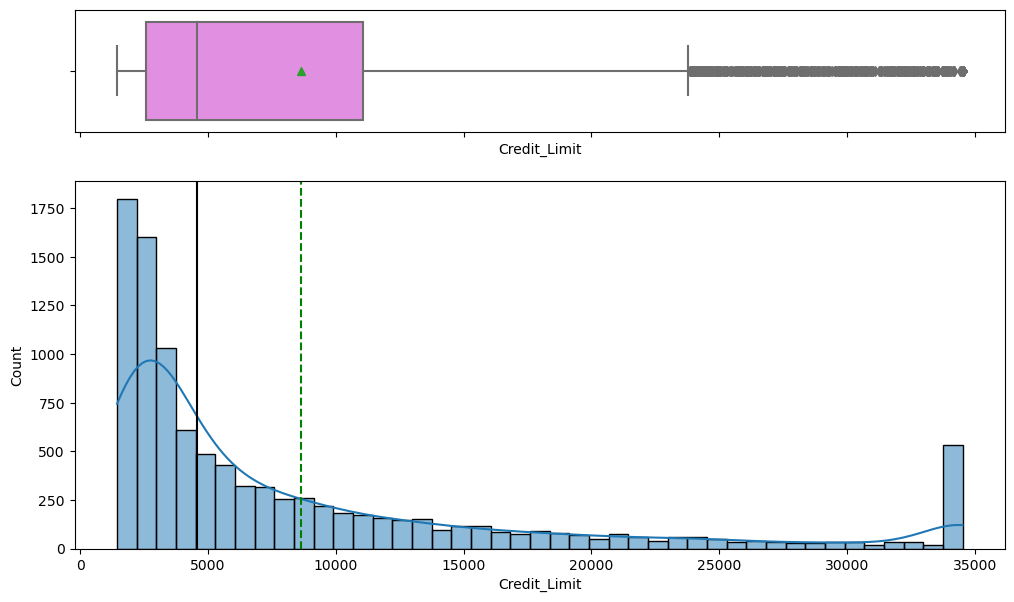

In [50]:
histogram_boxplot(df, "Credit_Limit", kde=True)

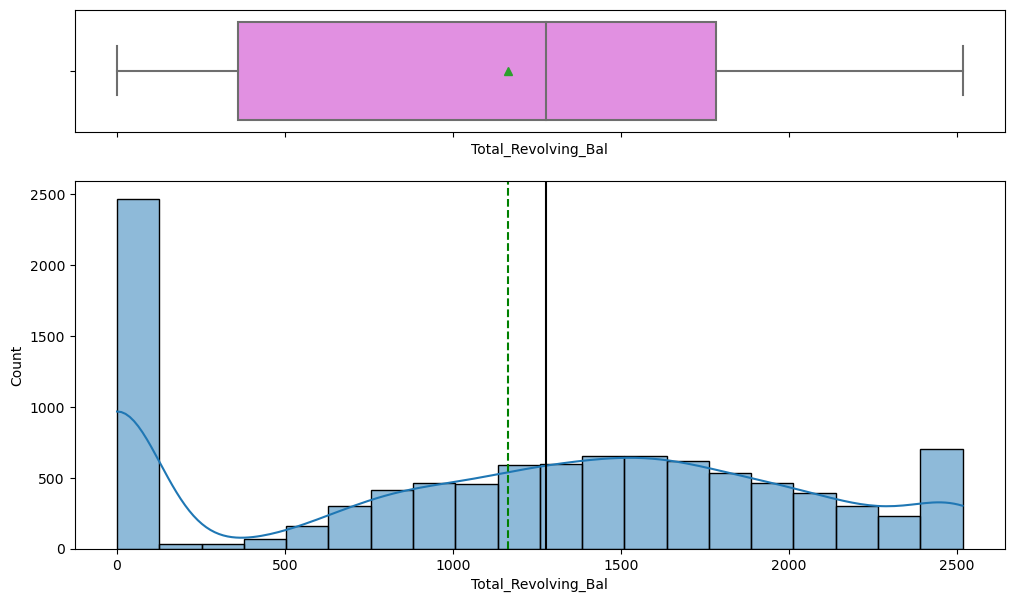

In [51]:
histogram_boxplot(df, "Total_Revolving_Bal", kde=True)

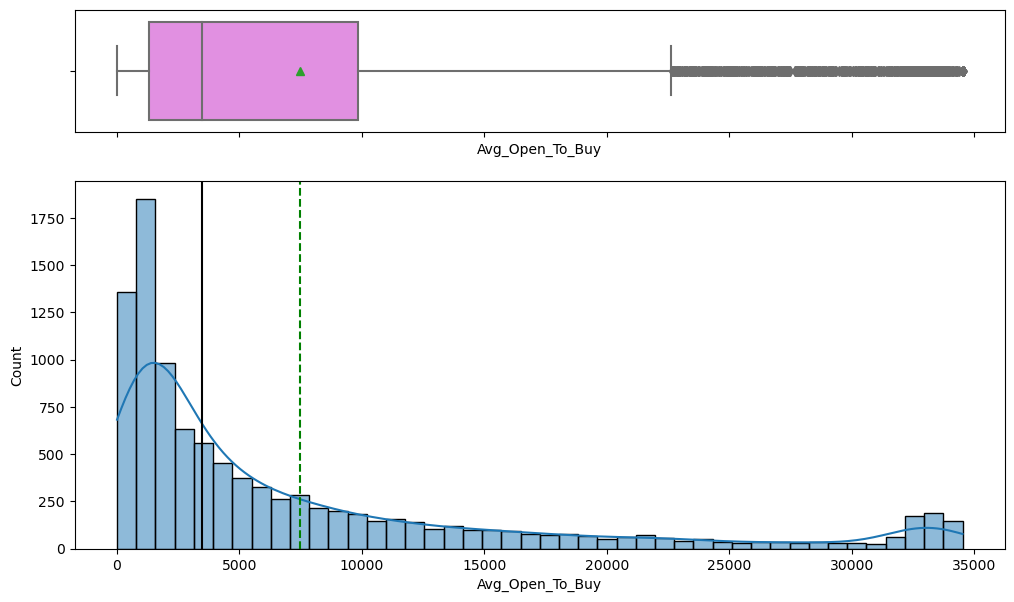

In [52]:
histogram_boxplot(df, "Avg_Open_To_Buy", kde=True)

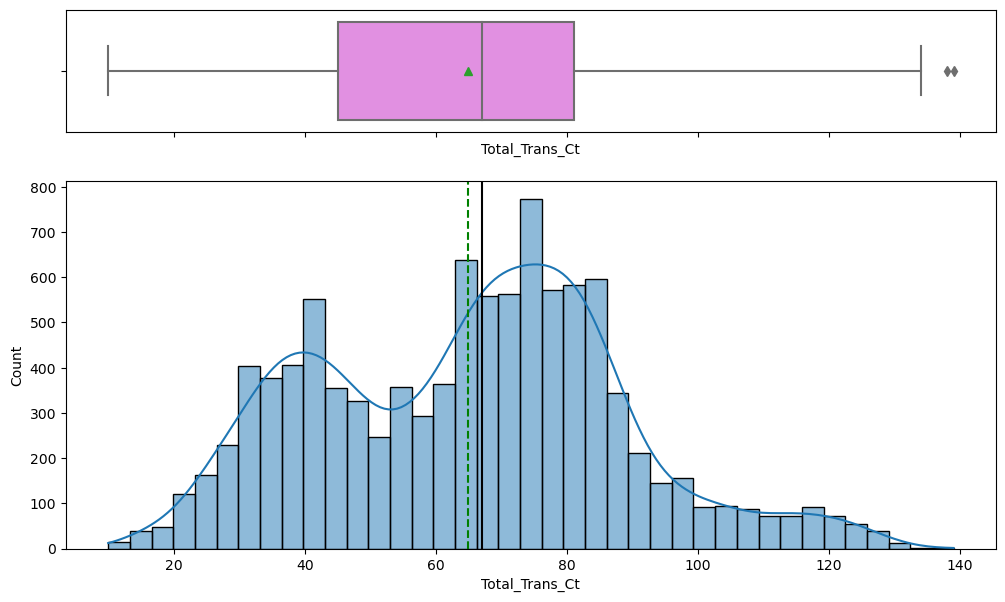

In [53]:
histogram_boxplot(df, "Total_Trans_Ct", kde=True)

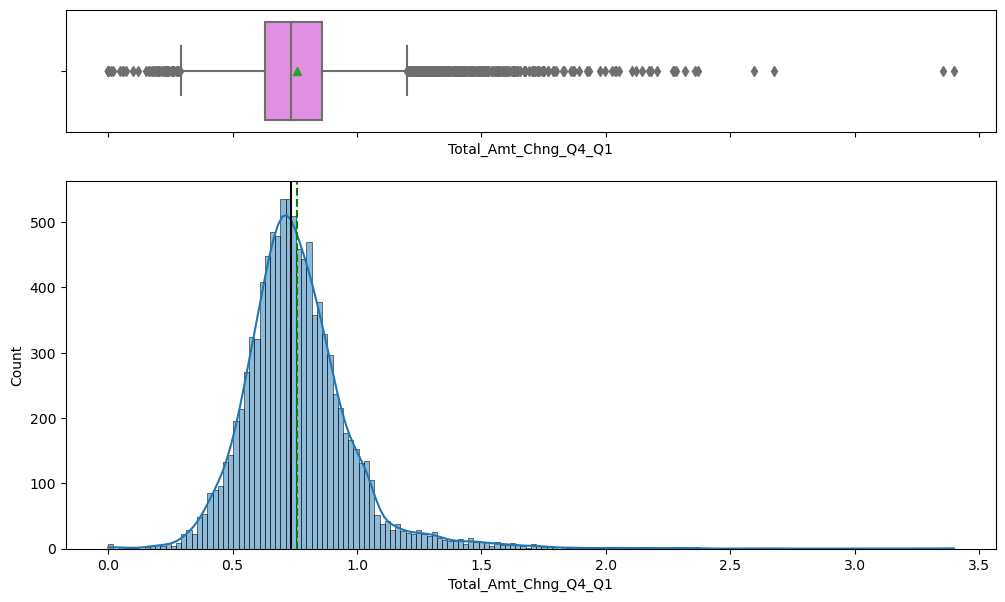

In [54]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1", kde=True)

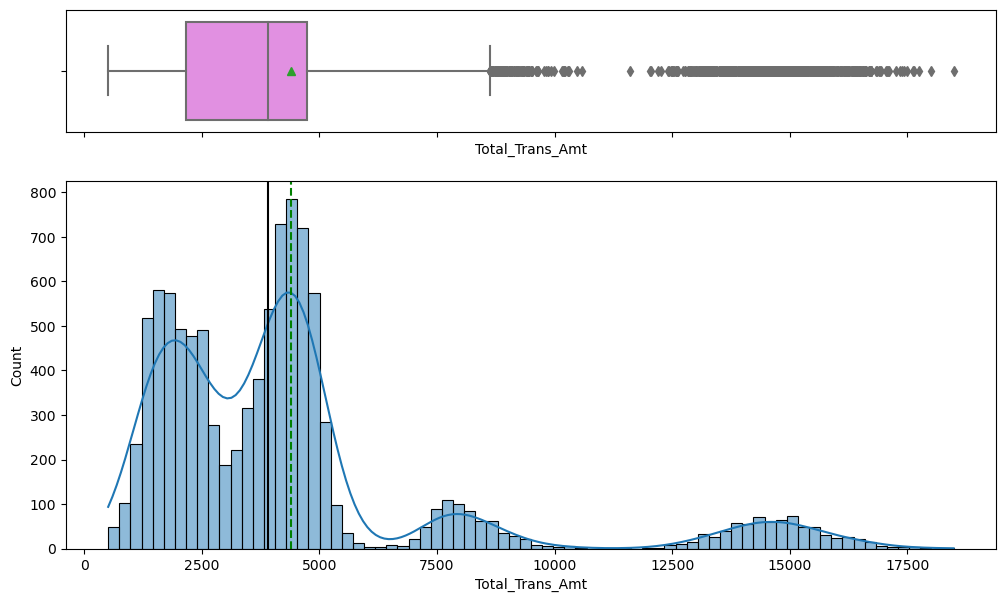

In [55]:
histogram_boxplot(df, "Total_Trans_Amt", kde=True)

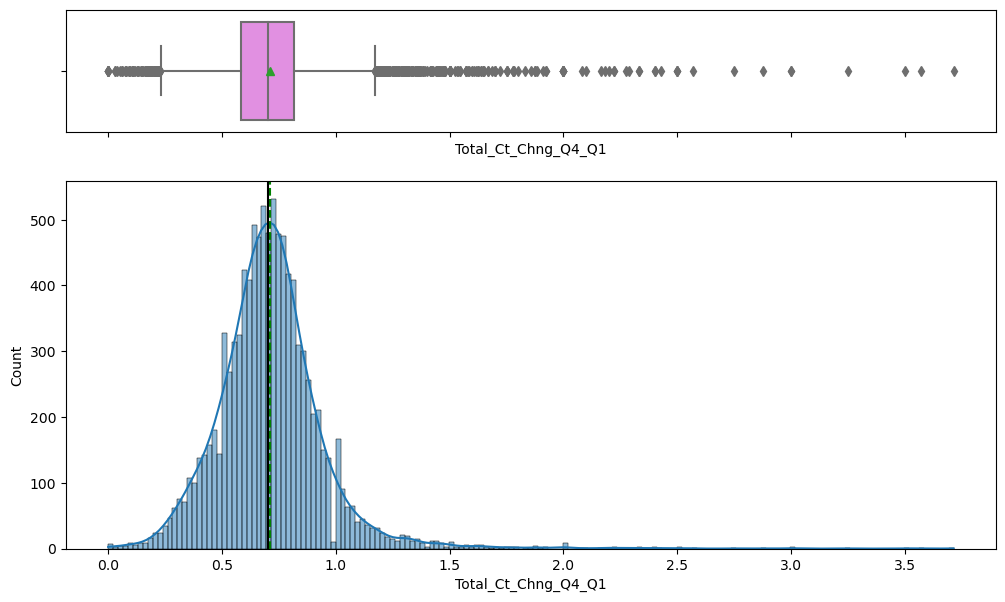

In [56]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1", kde=True)

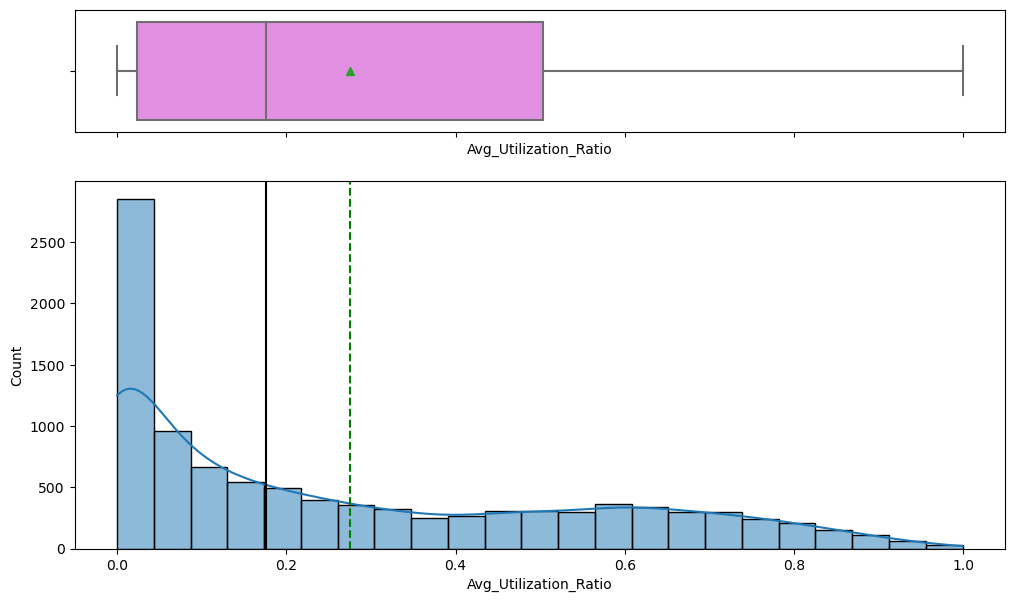

In [57]:
histogram_boxplot(df, "Avg_Utilization_Ratio", kde=True)

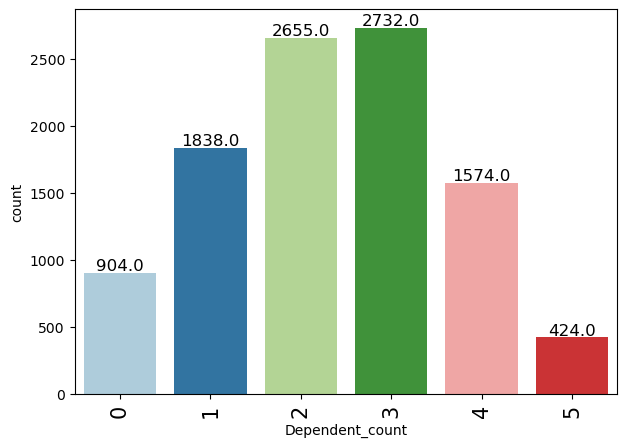

In [64]:
labeled_barplot(df, "Dependent_count")

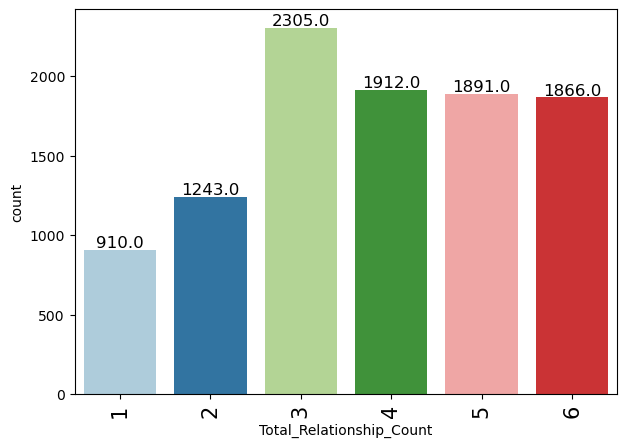

In [65]:
labeled_barplot(df, "Total_Relationship_Count")

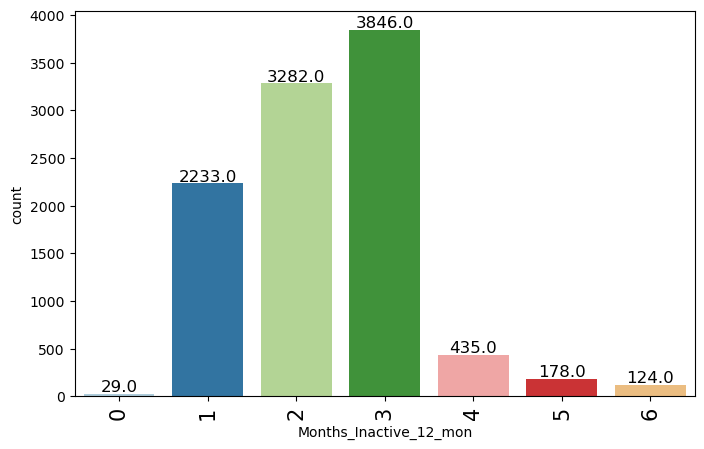

In [66]:
labeled_barplot(df, "Months_Inactive_12_mon")

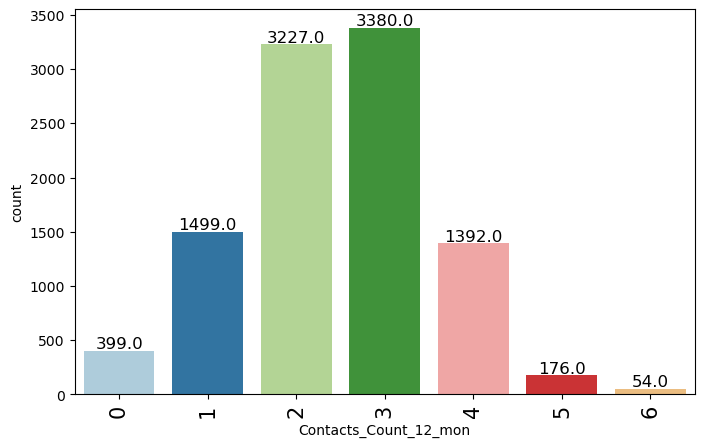

In [67]:
labeled_barplot(df, "Contacts_Count_12_mon")

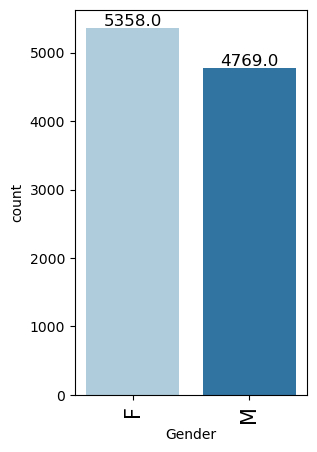

In [68]:
labeled_barplot(df, "Gender")

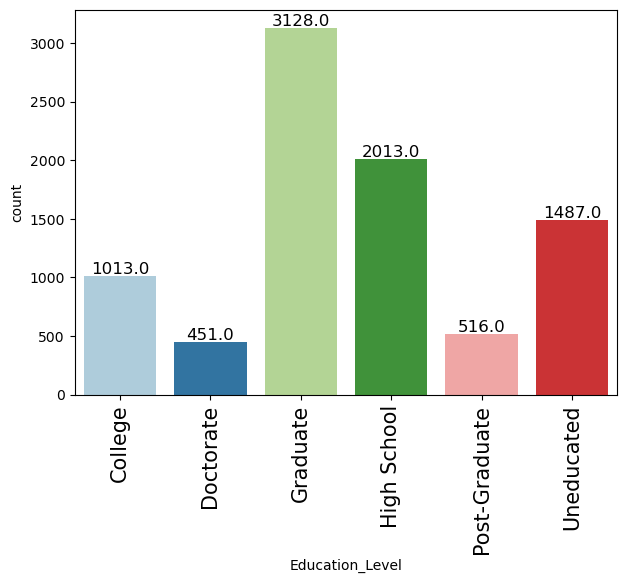

In [69]:
labeled_barplot(df, "Education_Level")

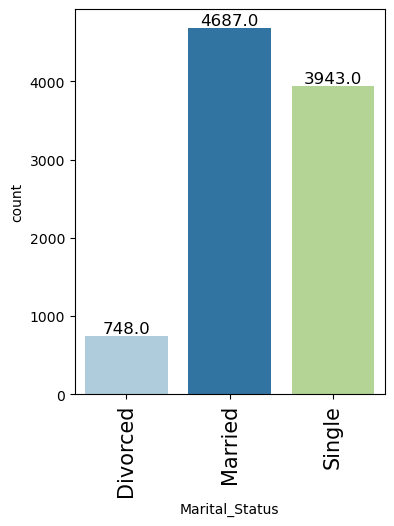

In [70]:
labeled_barplot(df, "Marital_Status")

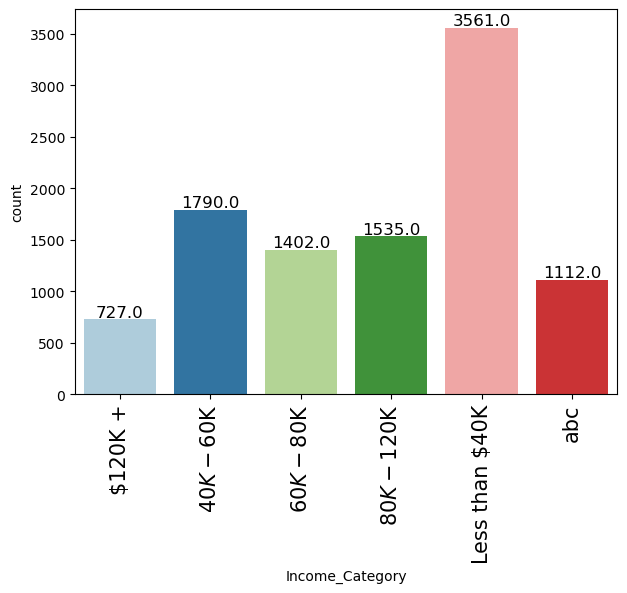

In [71]:
labeled_barplot(df, "Income_Category")

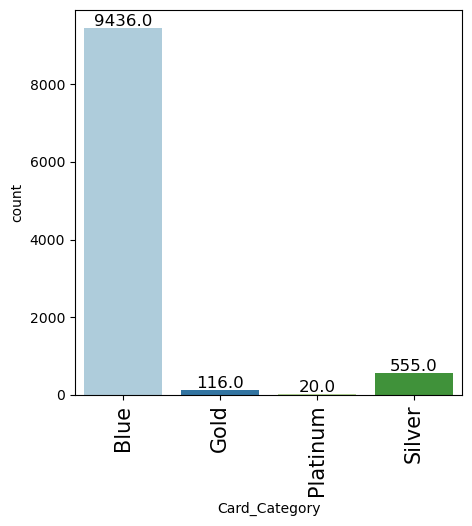

In [72]:
labeled_barplot(df, "Card_Category")

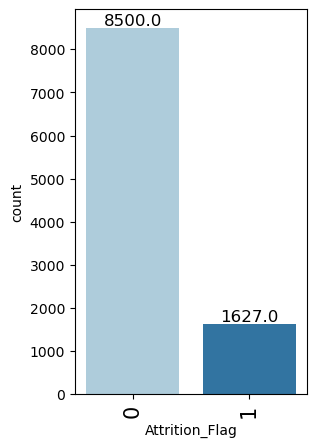

In [73]:
labeled_barplot(df, "Attrition_Flag")

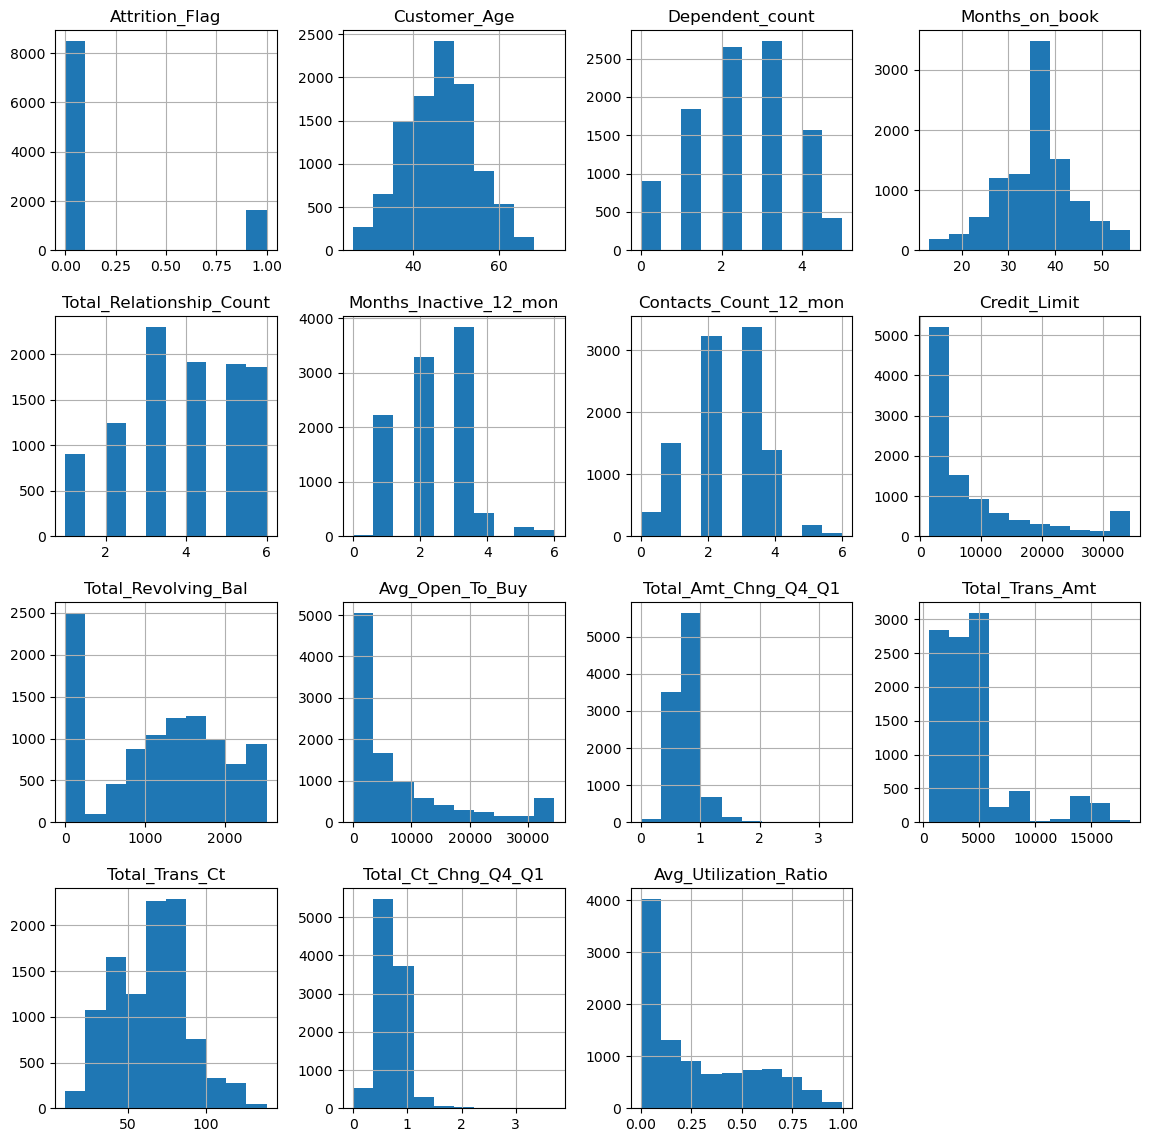

In [74]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_Revolving_Bal       10127 non-null  int64  
 15  Avg_Open_To_Buy           10127 non-null  float64
 16  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 17  Total_Trans_Amt           10127 non-null  int64  
 18  Total_Trans_Ct            10127 non-null  int64  
 19  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 20  Avg_Utilization_Ratio     10127 non-null  float64

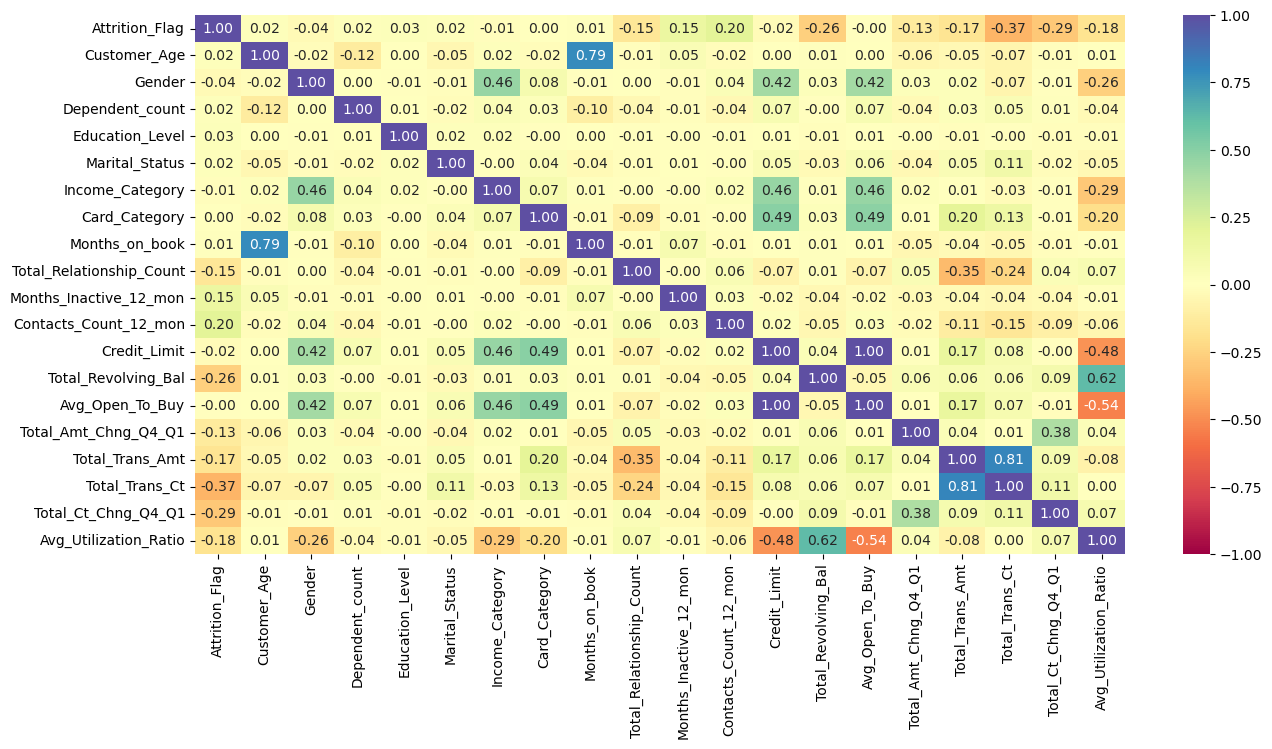

In [84]:
## Lets see the overall heatmap
df_corr = df.copy()

## Convert the Gender to Male and Female
df_corr["Gender"].replace("F", 1, inplace=True)
df_corr["Gender"].replace("M", 2, inplace=True)

## Convert the Education_Level 
df_corr["Education_Level"].replace("Graduate", 1, inplace=True)
df_corr["Education_Level"].replace("High School", 2, inplace=True)
df_corr["Education_Level"].replace("Uneducated", 3, inplace=True)
df_corr["Education_Level"].replace("College", 4, inplace=True)
df_corr["Education_Level"].replace("Post-Graduate", 5, inplace=True)
df_corr["Education_Level"].replace("Doctorate", 6, inplace=True)

## Convert the Marital_Status 
df_corr["Marital_Status"].replace("Married", 1, inplace=True)
df_corr["Marital_Status"].replace("Single", 2, inplace=True)
df_corr["Marital_Status"].replace("Divorced", 3, inplace=True)

## Convert the Card_Category 
df_corr["Card_Category"].replace("Blue", 1, inplace=True)
df_corr["Card_Category"].replace("Silver", 2, inplace=True)
df_corr["Card_Category"].replace("Gold", 3, inplace=True)
df_corr["Card_Category"].replace("Platinum", 4, inplace=True)

## Convert the Income_Category 
df_corr["Income_Category"].replace("Less than $40K", 1, inplace=True)
df_corr["Income_Category"].replace("$40K - $60K", 2, inplace=True)
df_corr["Income_Category"].replace("$80K - $120K", 3, inplace=True)
df_corr["Income_Category"].replace("$60K - $80K", 4, inplace=True)
df_corr["Income_Category"].replace("abc", 5, inplace=True)
df_corr["Income_Category"].replace("$120K +", 6, inplace=True)

plt.figure(figsize=(15, 7))
sns.heatmap(df_corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Customer_Age and Months_on_book are highly correlated
- Total_Trans_Amt and Total_Trans_Ct are highly correlated
- Total_Revolving_Bal and Avg_Utilization_Ratio are highly correlated
- Avg_Open_To_Buy and Avg_Utilization_Ratio are -ively correlated

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


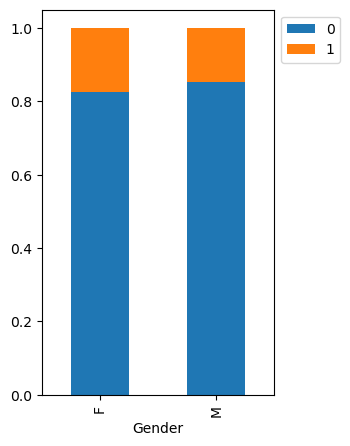

In [88]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


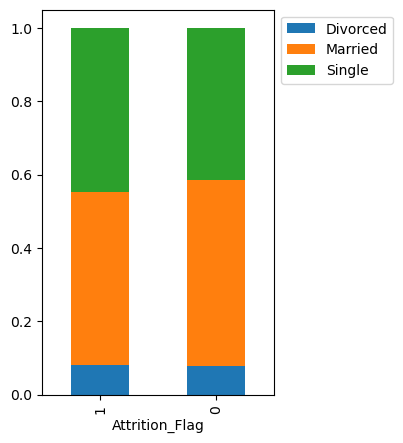

In [89]:
stacked_barplot(df, "Attrition_Flag", "Marital_Status")

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                              
All                 1013        451      3128         2013            516   
0                    859        356      2641         1707            424   
1                    154         95       487          306             92   

Education_Level  Uneducated   All  
Attrition_Flag                     
All                    1487  8608  
0                      1250  7237  
1                       237  1371  
------------------------------------------------------------------------------------------------------------------------


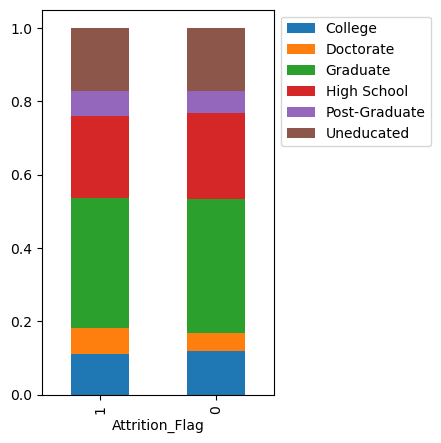

In [90]:
stacked_barplot(df, "Attrition_Flag", "Education_Level")

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


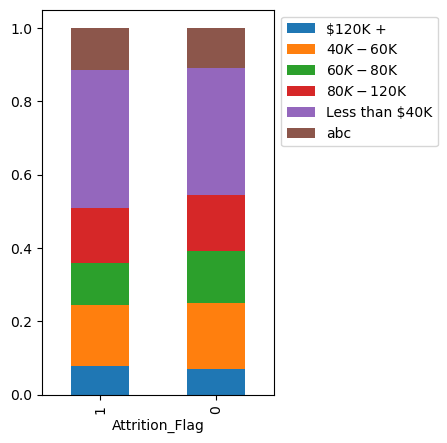

In [91]:
stacked_barplot(df, "Attrition_Flag", "Income_Category")

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


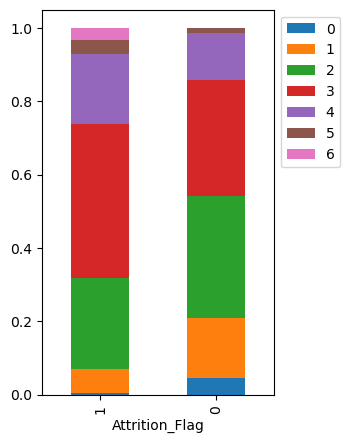

In [92]:
stacked_barplot(df, "Attrition_Flag", "Contacts_Count_12_mon")

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


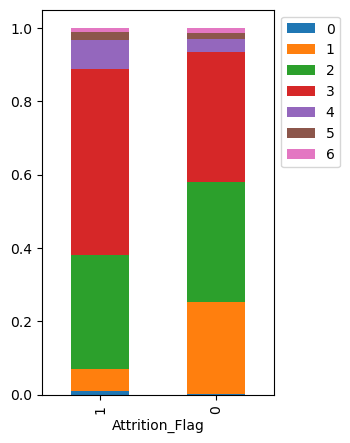

In [93]:
stacked_barplot(df, "Attrition_Flag", "Months_Inactive_12_mon")

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


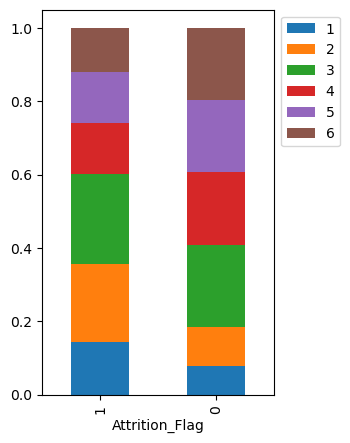

In [94]:
stacked_barplot(df, "Attrition_Flag", "Total_Relationship_Count")

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


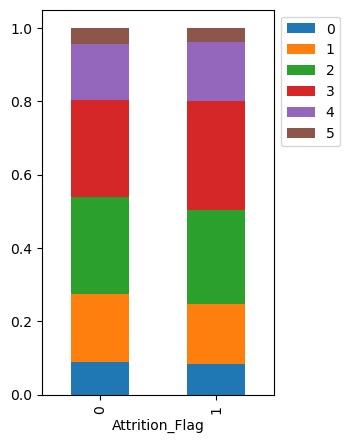

In [95]:
stacked_barplot(df, "Attrition_Flag", "Dependent_count")

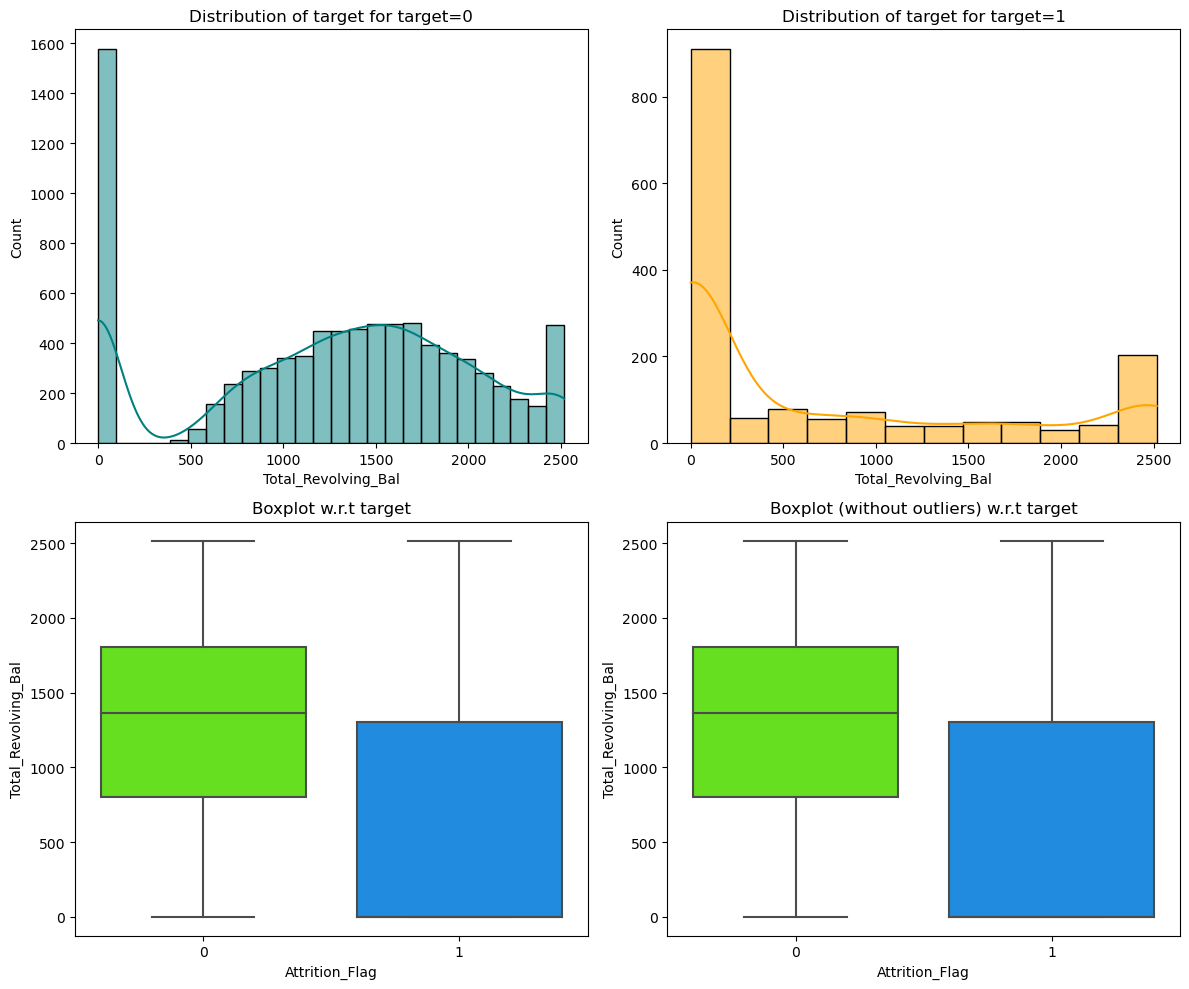

In [97]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

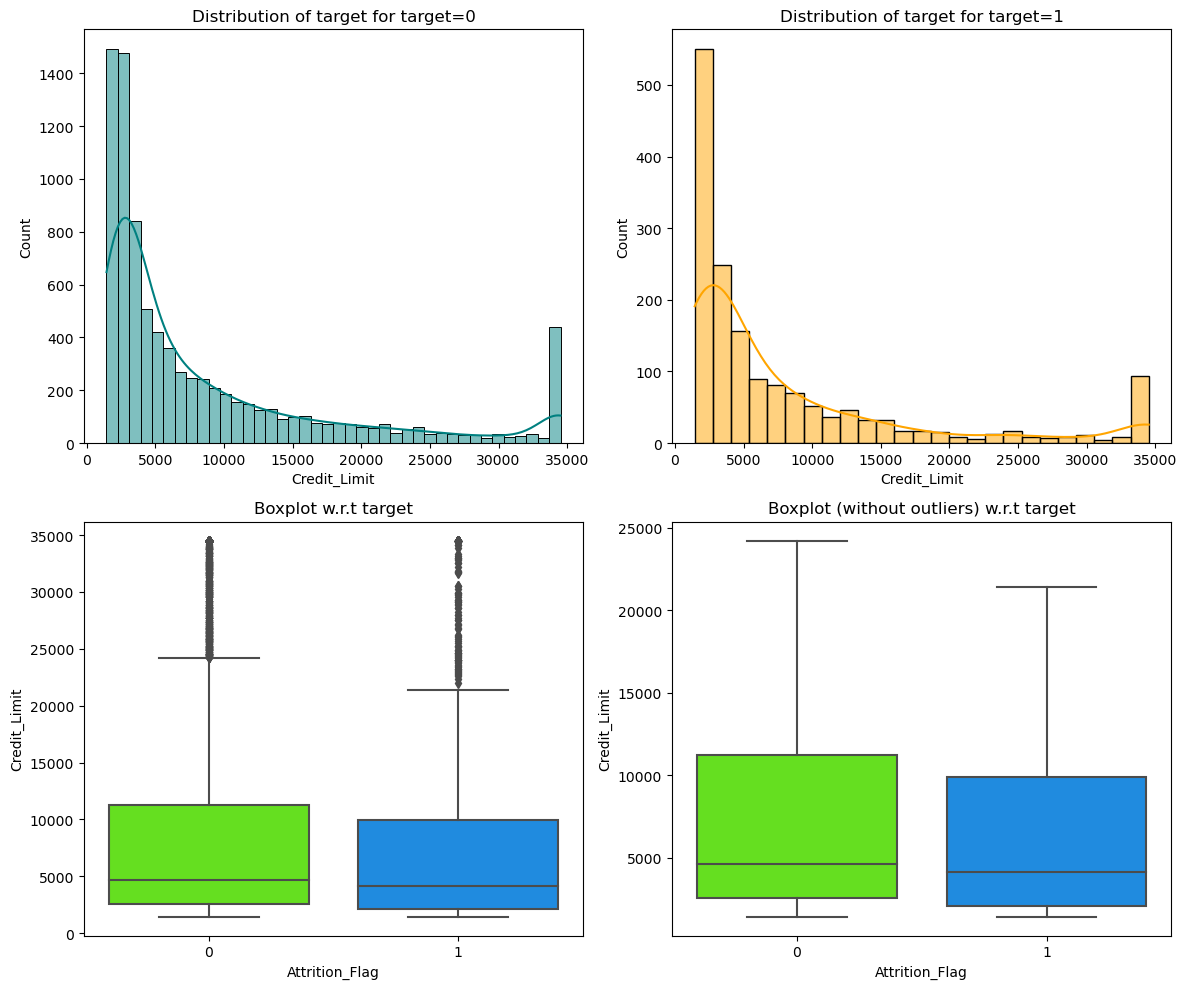

In [105]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

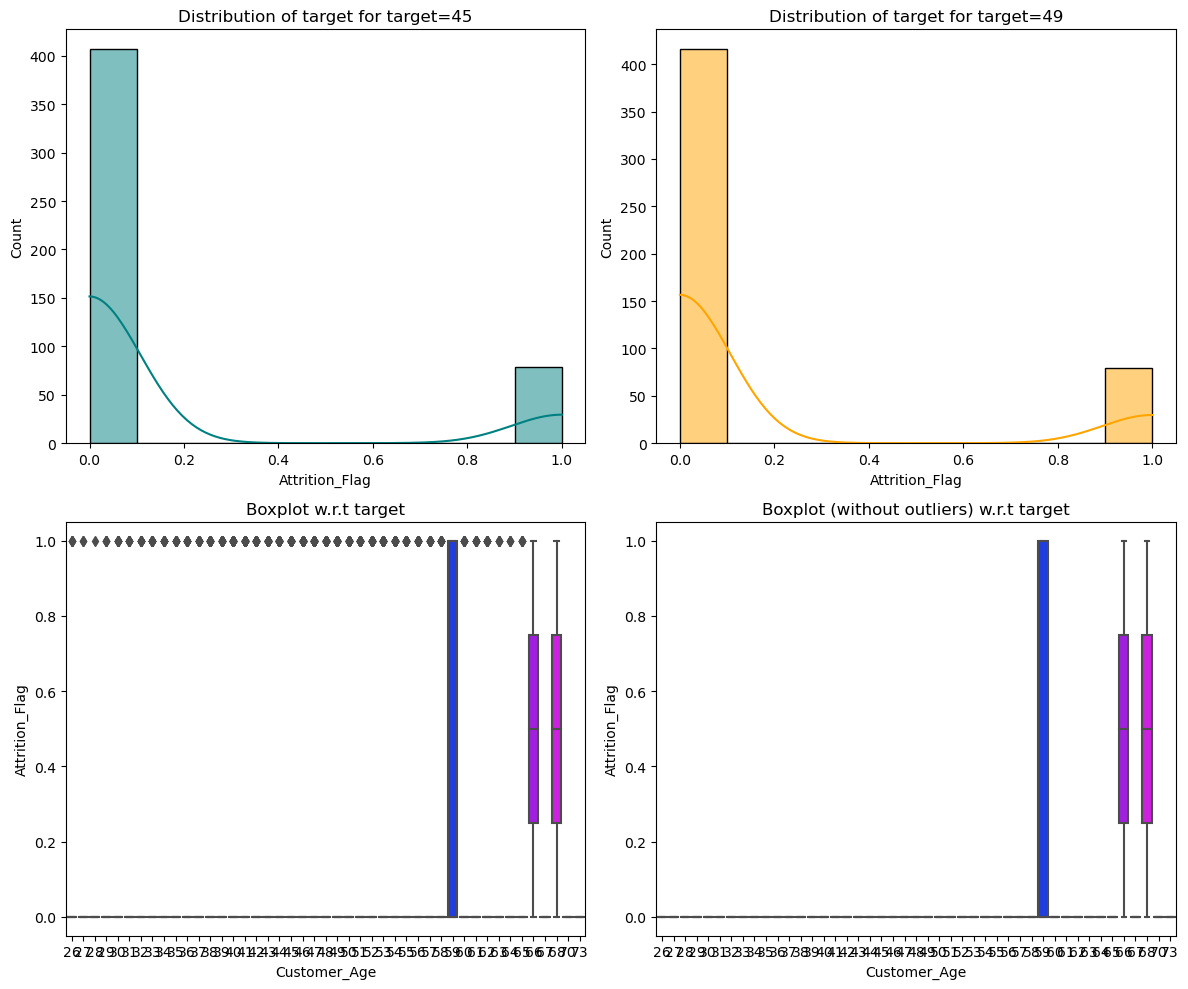

In [99]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Customer_Age")

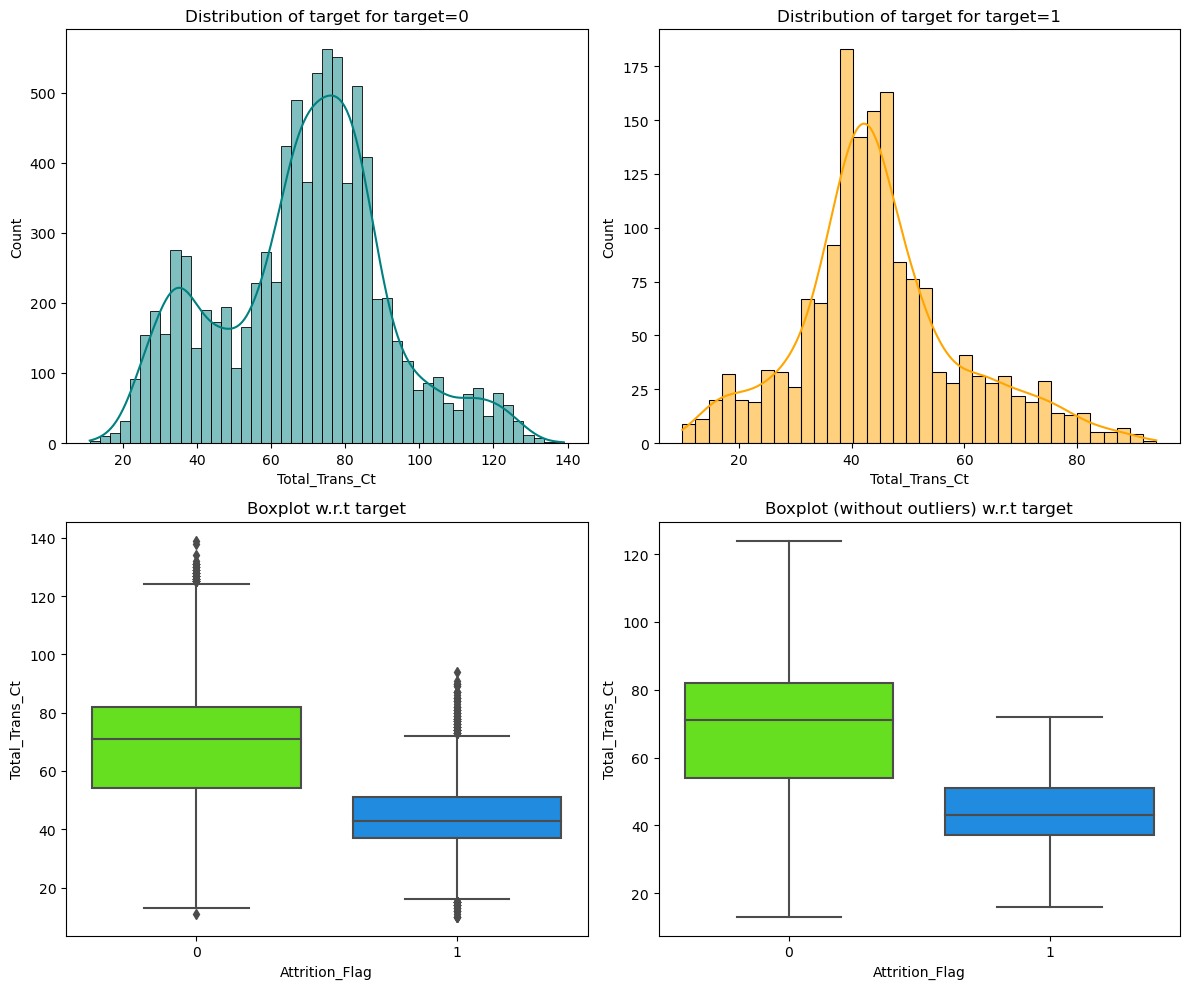

In [106]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

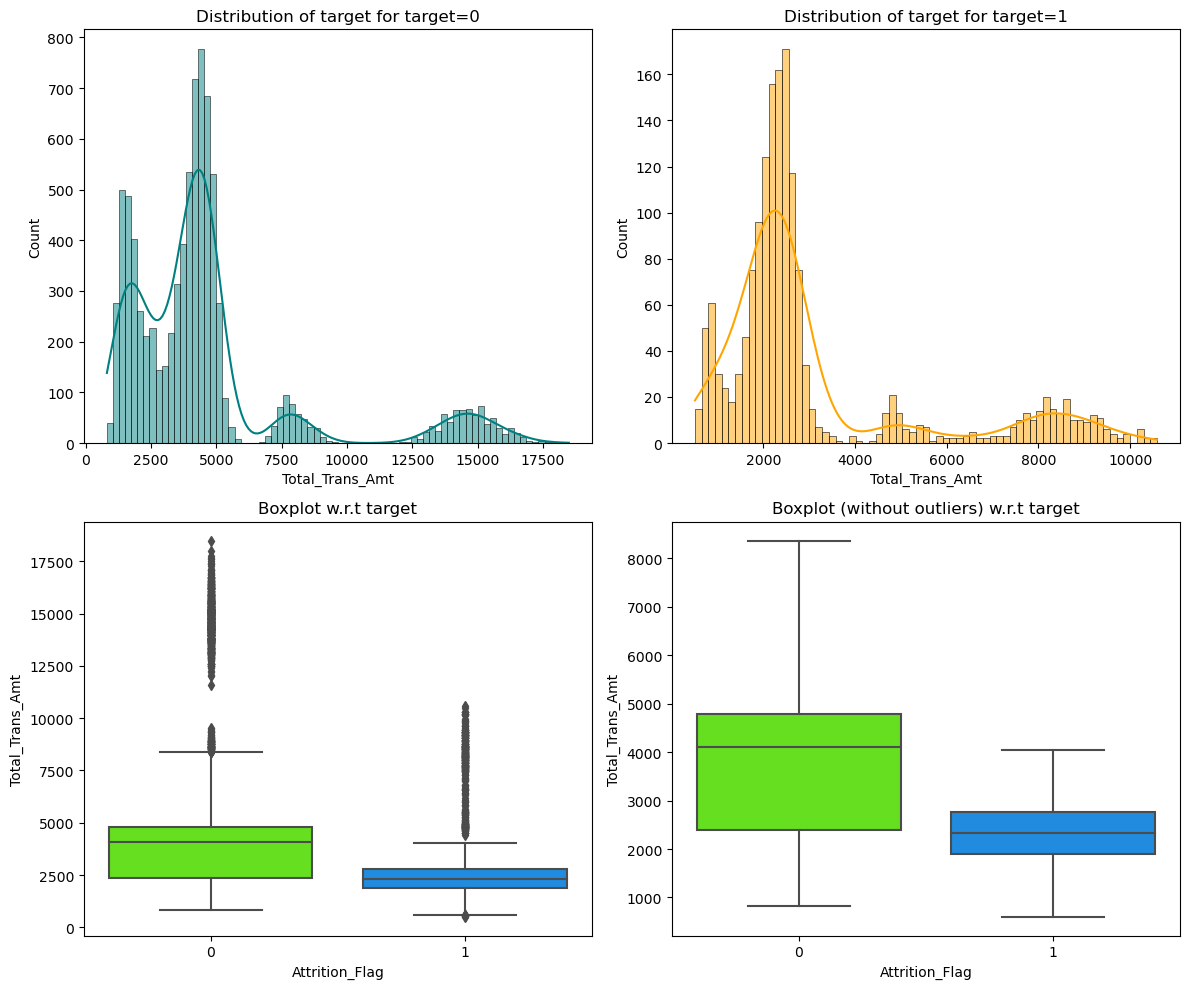

In [104]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

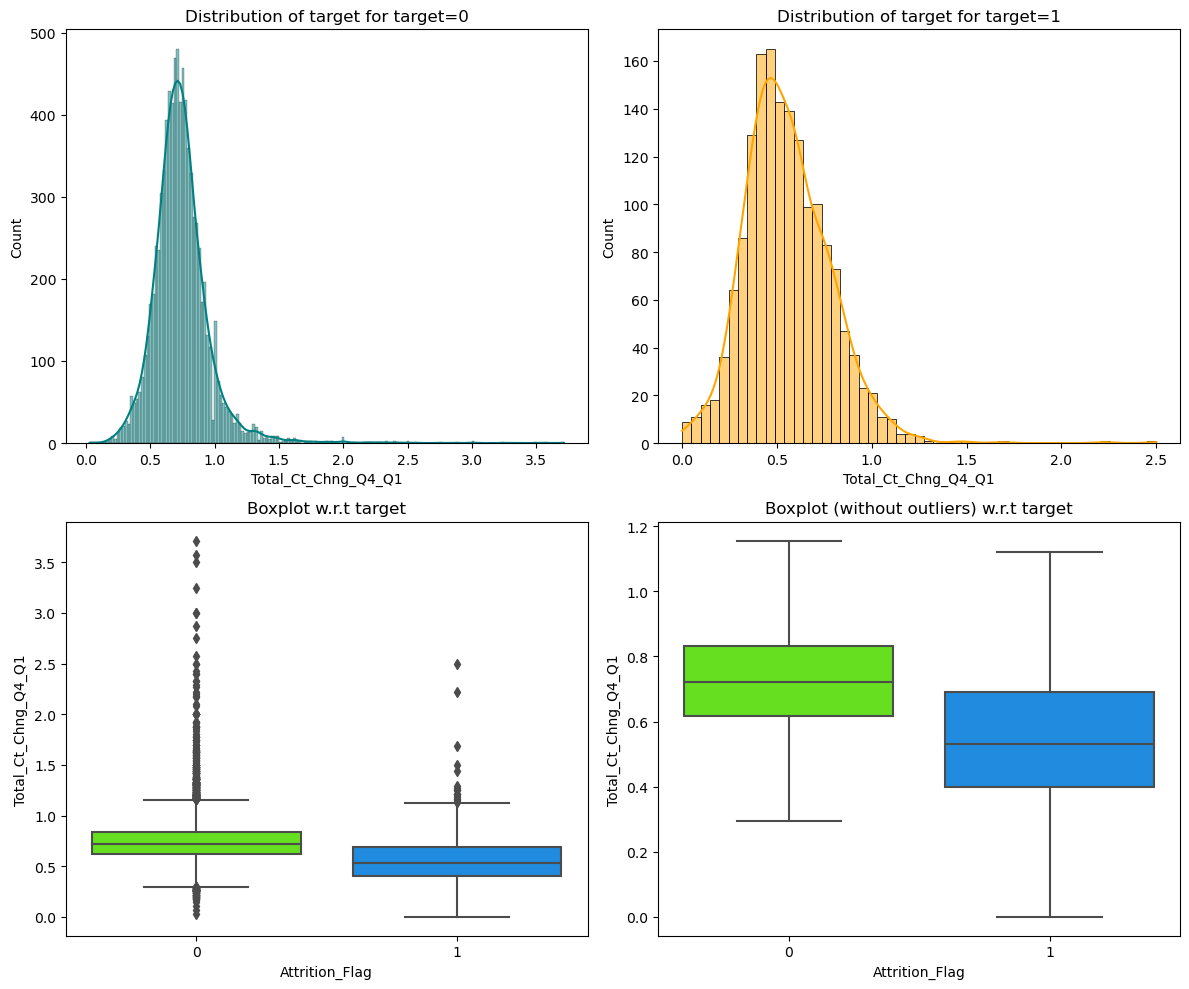

In [103]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

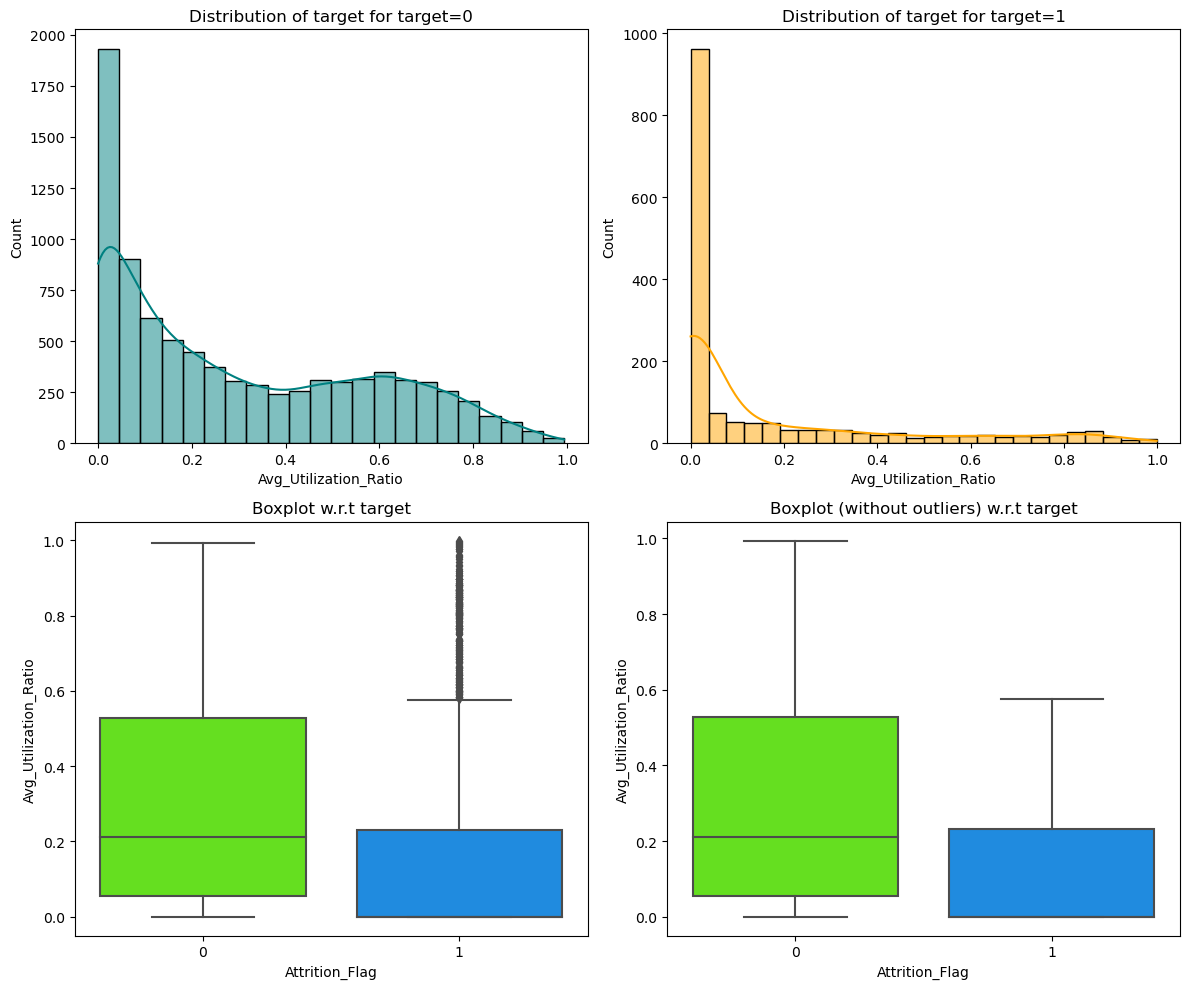

In [107]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

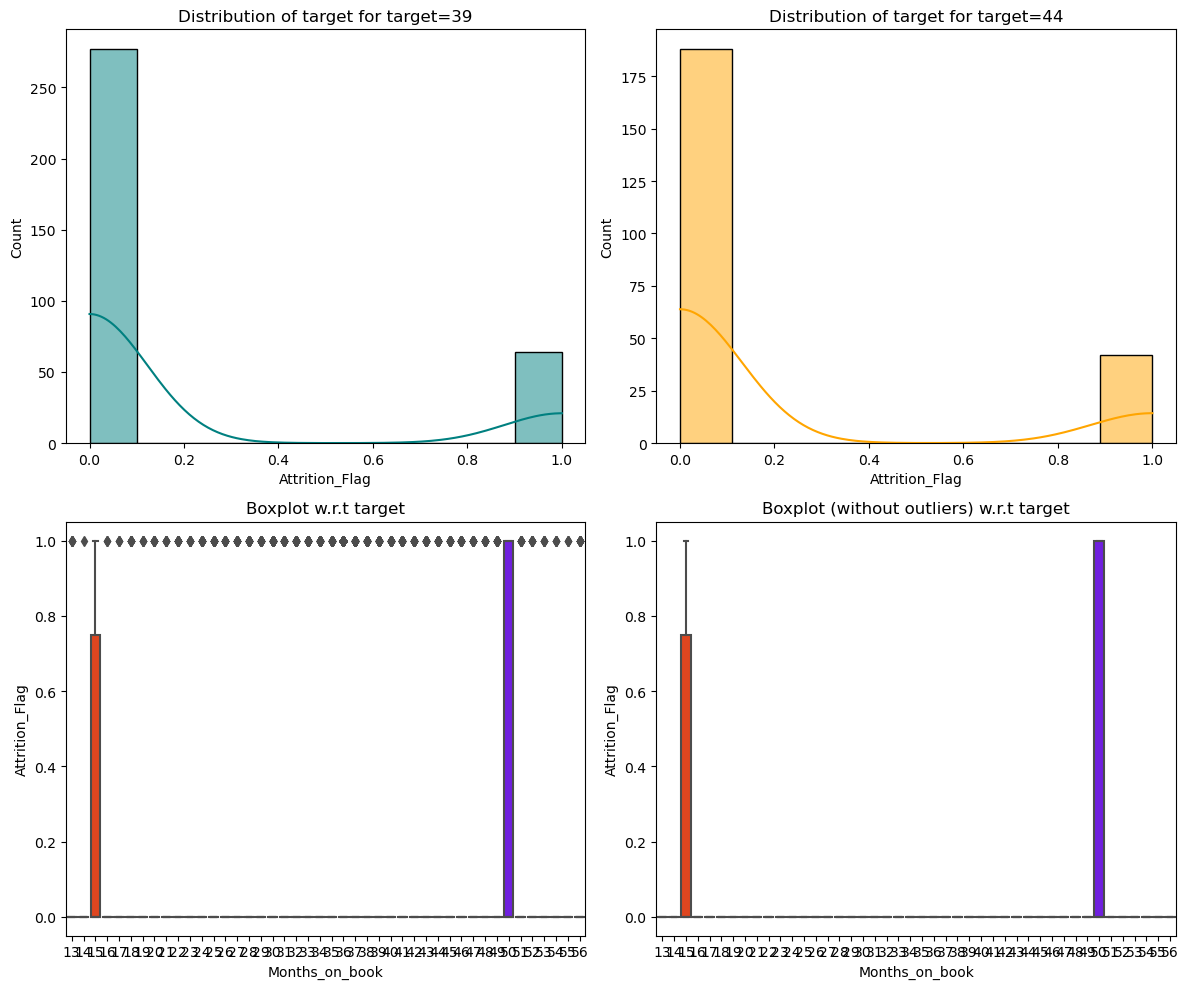

In [108]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Months_on_book")

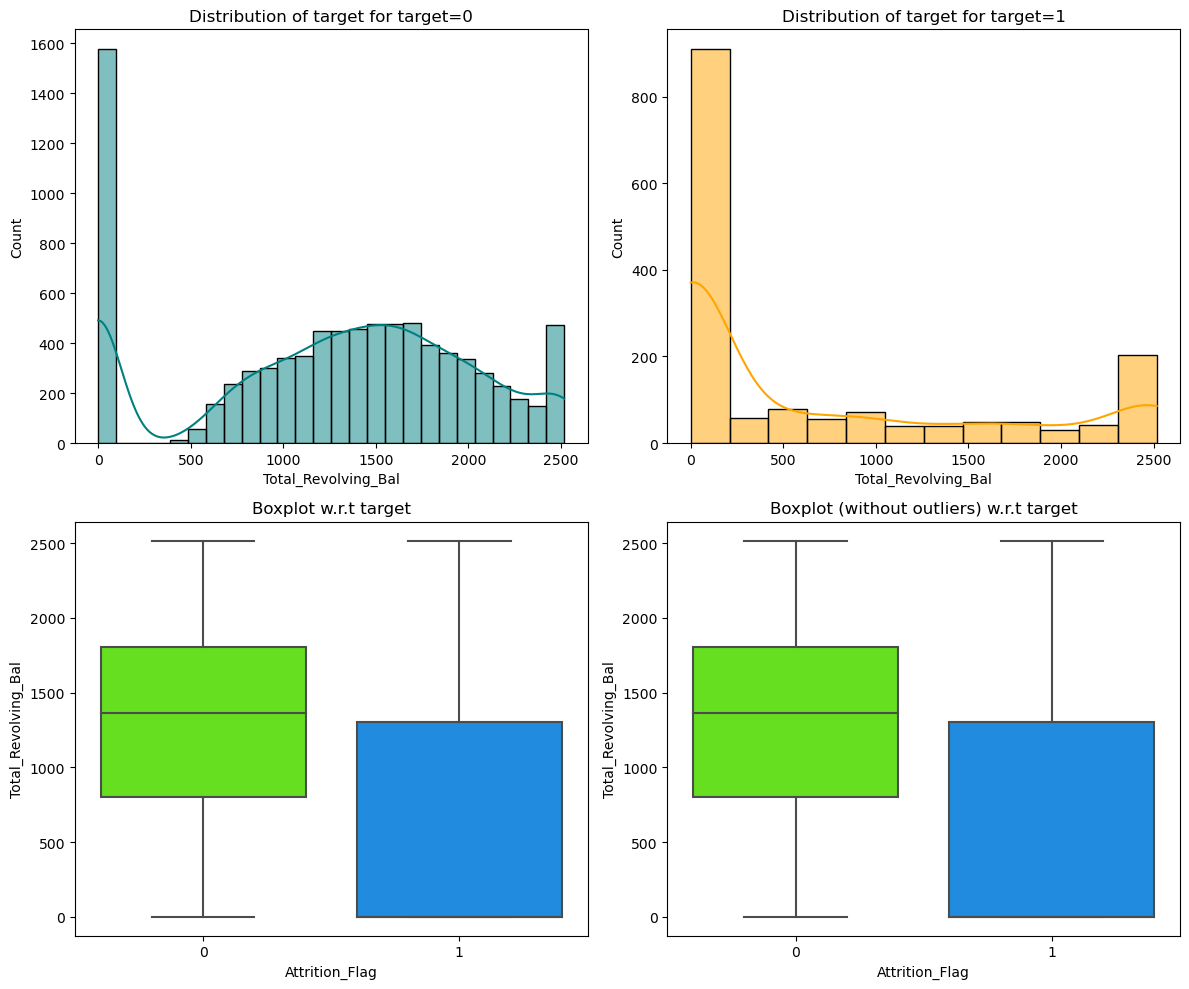

In [110]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

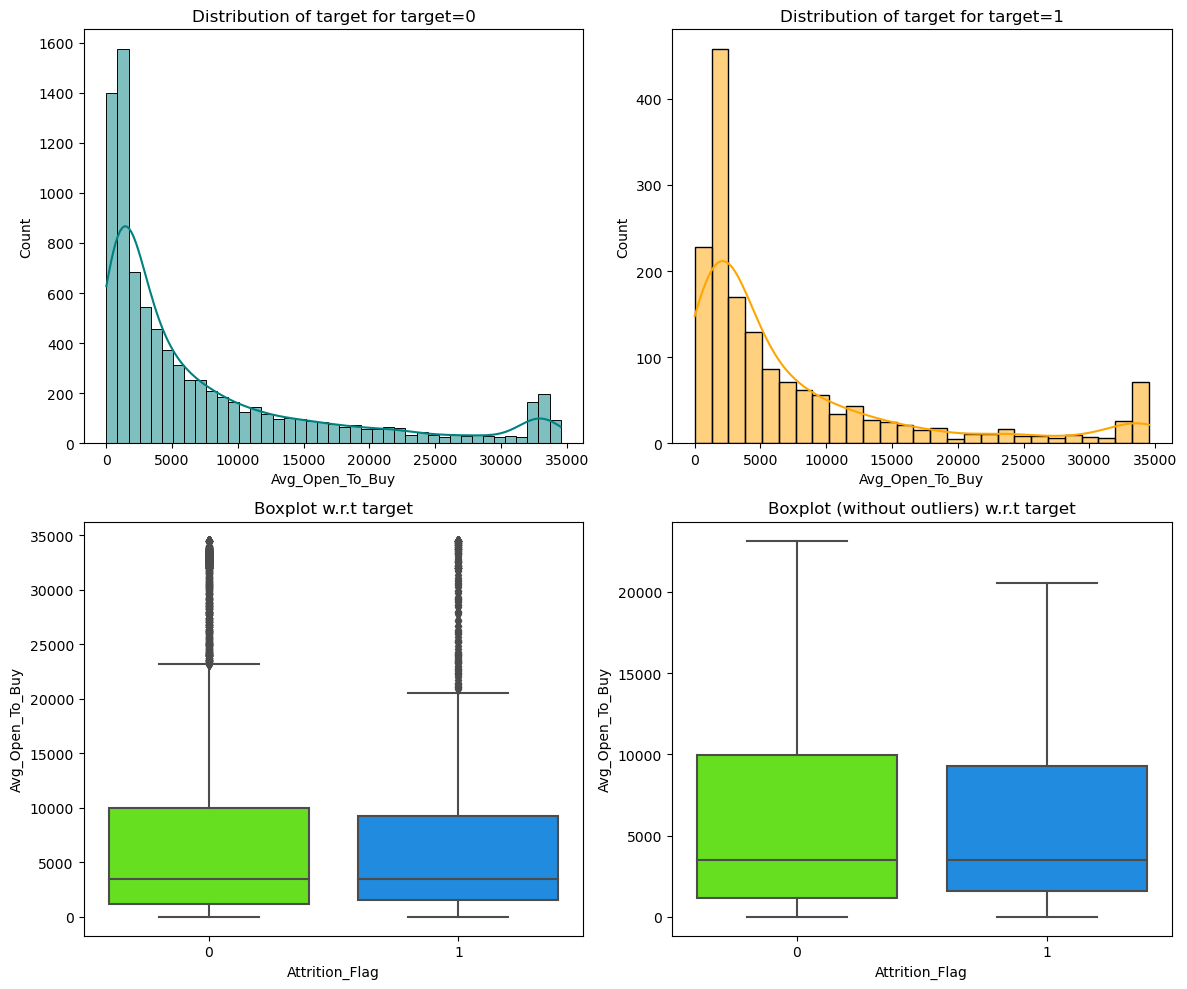

In [111]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

## Data Pre-processing

In [ ]:
data = df.copy()

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   float64
 5   Marital_Status            9378 non-null   float64
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [117]:
data = df.copy()
## Convert the categorical data into numeric values

## Convert the Gender to Male and Female
data["Gender"].replace("F", 1, inplace=True)
data["Gender"].replace("M", 2, inplace=True)

## Convert the Education_Level 
data["Education_Level"].replace("Graduate", 1, inplace=True)
data["Education_Level"].replace("High School", 2, inplace=True)
data["Education_Level"].replace("Uneducated", 3, inplace=True)
data["Education_Level"].replace("College", 4, inplace=True)
data["Education_Level"].replace("Post-Graduate", 5, inplace=True)
data["Education_Level"].replace("Doctorate", 6, inplace=True)

## Convert the Marital_Status 
data["Marital_Status"].replace("Married", 1, inplace=True)
data["Marital_Status"].replace("Single", 2, inplace=True)
data["Marital_Status"].replace("Divorced", 3, inplace=True)

## Convert the Card_Category 
data["Card_Category"].replace("Blue", 1, inplace=True)
data["Card_Category"].replace("Silver", 2, inplace=True)
data["Card_Category"].replace("Gold", 3, inplace=True)
data["Card_Category"].replace("Platinum", 4, inplace=True)

## Convert the Income_Category 
data["Income_Category"].replace("Less than $40K", 1, inplace=True)
data["Income_Category"].replace("$40K - $60K", 2, inplace=True)
data["Income_Category"].replace("$80K - $120K", 3, inplace=True)
data["Income_Category"].replace("$60K - $80K", 4, inplace=True)
data["Income_Category"].replace("abc", 5, inplace=True)
data["Income_Category"].replace("$120K +", 6, inplace=True)

In [119]:
#  Detecting the outliers in the datasets
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [121]:
# checking the % outliers
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Gender                      0.000
Dependent_count             0.000
Education_Level             0.000
Marital_Status              0.000
Income_Category             0.000
Card_Category               6.823
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

In [147]:
#Copy the original dataframe for model preparations
mod_df = df.copy()

In [148]:
# Just print the dataframe
mod_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


## Missing value imputation




In [149]:
## We know while converting the categorical value abc to 5.
mod_df["Income_Category"].replace("abc", np.nan, inplace=True)

In [150]:
mod_df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Train-Test Split

In [151]:
# Dividing train data into X and y

X = mod_df.drop(["Attrition_Flag"], axis=1)
y = mod_df["Attrition_Flag"]

In [152]:
# Splitting data into training and validation set:
X_temp, X_test, y_temp, y_test = train_test_split( X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [153]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [154]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.fit_transform(X_val[reqd_col_for_impute]) 

# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute]) 


In [144]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [155]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [156]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1095
M     931
Name: count, dtype: int64
******************************
Education_Level
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: count, dtype: int64
******************************
Marital_Status
Married     1100
Single       770
Divorced     156
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: count, dtype: int64
******************************
Card_Category
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: count, dtype: int64
******************************


In [157]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [161]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True) 
X_test = pd.get_dummies(X_test, drop_first=True) 
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


- After the dummy encoding we have around 29 columns

## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [164]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [165]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [166]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9774590163934426
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
dtree: 1.0

Validation Performance:

Bagging: 0.7699386503067485
Random forest: 0.7484662576687117
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
dtree: 0.7944785276073619


### Model Building with Oversampled data


In [167]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [168]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) 
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9792116101196313
Adaboost: 0.964698960580506
dtree: 1.0

Validation Performance:

Bagging: 0.8619631901840491
Random forest: 0.8619631901840491
GBM: 0.9049079754601227
Adaboost: 0.901840490797546
dtree: 0.8650306748466258


### Model Building with Undersampled data

In [169]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [170]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [171]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) 
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
dtree: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
dtree: 0.9202453987730062


### HyperparameterTuning

#### Sample Parameter Grids

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [173]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


In [212]:
tuned_dtc = DecisionTreeClassifier (
random_state=1,
min_samples_leaf=7,
min_impurity_decrease =0.0001,
max_leaf_nodes=15,
max_depth=5   
)
tuned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [213]:
# Checking model's performance on training set
dtc_train = model_performance_classification_sklearn(tuned_dtc, X_train, y_train)
dtc_train

,Accuracy,Recall,Precision,F1
0,0.939,0.805,0.812,0.809


In [214]:
# Checking model's performance on validation set
dtc_val = model_performance_classification_sklearn(tuned_dtc, X_val, y_val)
dtc_val

,Accuracy,Recall,Precision,F1
0,0.930,0.782,0.785,0.783


#### Sample tuning method for Decision tree with oversampled data

In [174]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9048877215262945:


In [218]:
tuned_dtc1 = DecisionTreeClassifier (
random_state=1,
min_samples_leaf=1,
min_impurity_decrease =0.001,
max_leaf_nodes=15,
max_depth=4   
)
tuned_dtc1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [219]:
# Checking model's performance on training set
dtc_train1 = model_performance_classification_sklearn(tuned_dtc1, X_train_over, y_train_over)
dtc_train1

,Accuracy,Recall,Precision,F1
0,0.919,0.911,0.925,0.918


In [220]:
# Checking model's performance on validation set
dtc_val1 = model_performance_classification_sklearn(tuned_dtc1, X_val, y_val)
dtc_val1

,Accuracy,Recall,Precision,F1
0,0.914,0.862,0.685,0.764


#### Sample tuning method for Decision tree with undersampled data

In [175]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8934432234432235:


In [221]:
tuned_dtc2 = DecisionTreeClassifier (
random_state=1,
min_samples_leaf=7,
min_impurity_decrease =0.0001,
max_leaf_nodes=15,
max_depth=5   
)
tuned_dtc2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [222]:
# Checking model's performance on training set
dtc_train2 = model_performance_classification_sklearn(tuned_dtc2, X_train_un, y_train_un)
dtc_train2

,Accuracy,Recall,Precision,F1
0,0.914,0.940,0.894,0.916


In [223]:
# Checking model's performance on validation set
dtc_val2 = model_performance_classification_sklearn(tuned_dtc2, X_val, y_val)
dtc_val2

,Accuracy,Recall,Precision,F1
0,0.867,0.920,0.552,0.690


#### Tuning AdaBoost using Original dataset

In [176]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8360596546310832:
CPU times: user 1.9 s, sys: 628 ms, total: 2.53 s
Wall time: 13 s


In [178]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [179]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.982,0.927,0.961,0.944


In [180]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.967,0.856,0.933,0.893


#### Tuning AdaBoost using Undersampled dataset

In [177]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/shibgolder/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9477603349031922:
CPU times: user 785 ms, sys: 31.8 ms, total: 817 ms
Wall time: 4.33 s


In [225]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [226]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(tuned_adb2, X_train_un, y_train_un)
adb_train2

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [227]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb_val2

,Accuracy,Recall,Precision,F1
0,0.937,0.966,0.729,0.831


#### Tuning Gradient Boosting using original data

In [190]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8104395604395604:
CPU times: user 1.71 s, sys: 768 ms, total: 2.48 s
Wall time: 17.3 s


In [191]:
tuned_gbm = GradientBoostingClassifier(
     max_features=0.5,
     init=AdaBoostClassifier(random_state=1),
     random_state=1,
     learning_rate=0.1,
     n_estimators=100,
     subsample=0.9,
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [194]:
# Checking model's performance on training set
gmb_train = model_performance_classification_sklearn(tuned_gbm, X_train, y_train)
gmb_train

,Accuracy,Recall,Precision,F1
0,0.972,0.867,0.955,0.909


In [195]:
# Checking model's performance on validation set
gmb_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gmb_val

,Accuracy,Recall,Precision,F1
0,0.968,0.862,0.937,0.898


#### Tuning Gradient Boosting using undersampled data

In [196]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508267922553637:
CPU times: user 1.11 s, sys: 593 ms, total: 1.7 s
Wall time: 8.48 s


In [197]:
tuned_gbm1 = GradientBoostingClassifier(
     max_features=0.7,
     init=AdaBoostClassifier(random_state=1),
     random_state=1,
     learning_rate=0.1,
     n_estimators=75,
     subsample=0.9,
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [198]:
# Checking model's performance on training set
gmb_train1 = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un)
gmb_train1

,Accuracy,Recall,Precision,F1
0,0.970,0.977,0.964,0.970


In [199]:
# Checking model's performance on validation set
gmb_val1 = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gmb_val1

,Accuracy,Recall,Precision,F1
0,0.938,0.957,0.738,0.833


#### Tuning XGBoost Model with Original data

In [200]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.921098901098901:
CPU times: user 2.17 s, sys: 769 ms, total: 2.94 s
Wall time: 7.76 s


In [205]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [206]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.988,1.000,0.932,0.965


In [207]:
# Checking model's performance on validation set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.965,0.942,0.855,0.896


#### Tuning XGBoost Model with undersampled data

In [208]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 1.33 s, sys: 90.6 ms, total: 1.42 s
Wall time: 3.18 s


In [209]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)

tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [210]:
# Checking model's performance on training set
xgb_train1 = model_performance_classification_sklearn(tuned_xgb1, X_train_un, y_train_un)
xgb_train1

,Accuracy,Recall,Precision,F1
0,0.764,1.000,0.680,0.809


In [211]:
# Checking model's performance on validation set
xgb_val1 = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb_val1

,Accuracy,Recall,Precision,F1
0,0.591,1.000,0.282,0.441


## Model Comparison and Final Model Selection

In [229]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtc_train.T,
        dtc_train1.T,
        dtc_train2.T,
        adb_train.T,
        adb_train2.T,
        gmb_train.T,
        gmb_train1.T,
        xgb_train.T,
        xgb_train1.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree trained with original data",
    "Decision tree trained with Oversampled data",
    "Decision tree trained with Undersampled data",
    "AdaBoost trained with original data",
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with original data",
    "Gradient boosting trained with Undersampled data",
    "XGBoost trained with original data",
    "XGBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision tree trained with original data,Decision tree trained with Oversampled data,Decision tree trained with Undersampled data,AdaBoost trained with original data,AdaBoost trained with Undersampled data,Gradient boosting trained with original data,Gradient boosting trained with Undersampled data,XGBoost trained with original data,XGBoost trained with Undersampled data
Accuracy,0.939,0.919,0.914,0.943,0.973,0.972,0.970,0.988,0.764
Recall,0.805,0.911,0.940,0.978,0.978,0.867,0.977,1.000,1.000
Precision,0.812,0.925,0.894,0.746,0.968,0.955,0.964,0.932,0.680
F1,0.809,0.918,0.916,0.847,0.973,0.909,0.970,0.965,0.809


In [231]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtc_val.T,
        dtc_val1.T,
        dtc_val2.T,
        adb_val.T,
        adb_val2.T,
        gmb_val.T,
        gmb_val1.T,
        xgb_val.T,
        xgb_val1.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision tree validation with original data",
    "Decision tree validation with Oversampled data",
    "Decision tree validation with Undersampled data",
    "AdaBoost validation with original data",
    "AdaBoost validation with Undersampled data",
    "Gradient boosting validation with original data",
    "Gradient boosting validation with Undersampled data",
    "XGBoost validation with original data",
    "XGBoost validation with Undersampled data",
]
print("validation performance comparison:")
models_val_comp_df

validation performance comparison:


,Decision tree validation with original data,Decision tree validation with Oversampled data,Decision tree validation with Undersampled data,AdaBoost validation with original data,AdaBoost validation with Undersampled data,Gradient boosting validation with original data,Gradient boosting validation with Undersampled data,XGBoost validation with original data,XGBoost validation with Undersampled data
Accuracy,0.930,0.914,0.867,0.937,0.937,0.968,0.938,0.965,0.591
Recall,0.782,0.862,0.920,0.966,0.966,0.862,0.957,0.942,1.000
Precision,0.785,0.685,0.552,0.729,0.729,0.937,0.738,0.855,0.282
F1,0.783,0.764,0.690,0.831,0.831,0.898,0.833,0.896,0.441


- From the above model, seems XGBoost is the trained with original data is best model so far

### Test set final performance

In [232]:
# Checking model's performance on validation set
xgb_test = model_performance_classification_sklearn(tuned_xgb, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.969,0.951,0.868,0.907


### Feature Importance

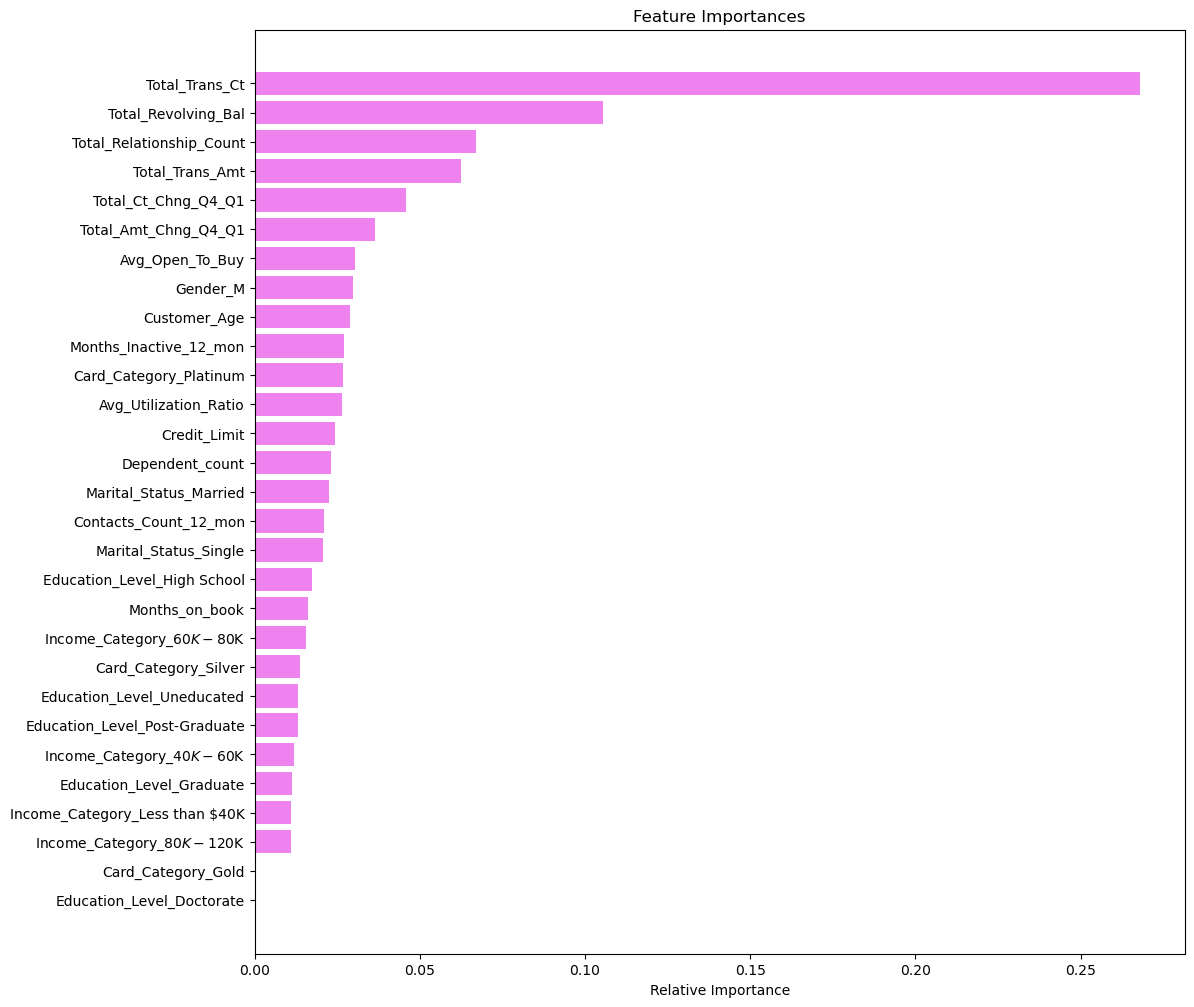

In [233]:
feature_names = X_train.columns
importances = tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

- Thera bank IT should leverage the best performing model which is XGBoost with a good reasonable generalization and best performance score in both test and traing set

- Thera Bank's Customers’ leaving credit cards services would lead bank to loss, so the bank to analyzed the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas
- Below some of the feature which banks should look at to reduce Customer's churns :
- Total Transaction Count 
- Total Revolving Balance on the Credit Card
- Total Transaction Amount
- Total_Ct_Chng_Q4_Q1
- Change in Transaction Amount
- There are other feature which is playing roles based on the above feature importance chart.